In [200]:
## Correlation between cell number and Agur Score 

In [ ]:
import pandas as pd
import anndata as ad
import os 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr


In [201]:
data_folder = "/home/ubuntu/frameshift-1/data/filtered_h5ad_allcellines/"

In [202]:
count_celline=[]
# Iterate over each file in the directory
for file_name in os.listdir(data_folder):
    file_path = os.path.join(data_folder, file_name)
    print(f"Processing {file_name}...")
    # Read in backed mode
    adata = ad.read_h5ad(file_path, backed='r')
    # Count unique cell line values
    celline_counts = adata.obs.groupby(['plate', 'cell_name', 'drug']).size().reset_index(name='count')
    # Append to the list
    count_celline.append(celline_counts)

Processing subset_plate3_filt_Vevo_Tahoe100M_WServicesFrom_ParseGigalab.h5ad...


/tmp/ipykernel_216874/2605842088.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  celline_counts = adata.obs.groupby(['plate', 'cell_name', 'drug']).size().reset_index(name='count')


Processing subset_plate9_filt_Vevo_Tahoe100M_WServicesFrom_ParseGigalab.h5ad...


/tmp/ipykernel_216874/2605842088.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  celline_counts = adata.obs.groupby(['plate', 'cell_name', 'drug']).size().reset_index(name='count')


Processing subset_plate14_filt_Vevo_Tahoe100M_WServicesFrom_ParseGigalab.h5ad...


/tmp/ipykernel_216874/2605842088.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  celline_counts = adata.obs.groupby(['plate', 'cell_name', 'drug']).size().reset_index(name='count')


Processing subset_plate6_filt_Vevo_Tahoe100M_WServicesFrom_ParseGigalab.h5ad...


/tmp/ipykernel_216874/2605842088.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  celline_counts = adata.obs.groupby(['plate', 'cell_name', 'drug']).size().reset_index(name='count')


In [203]:
# Concatenate all DataFrames into a single DataFrame
all_counts = pd.concat(count_celline, ignore_index=True)
# Format
pivot_df = all_counts.pivot(index=['plate', 'drug'], columns='cell_name', values='count').fillna(0)
# Reset the index to turn the index into columns
pivot_df_reset = pivot_df.reset_index()

In [204]:
# Rename the column 'drug' to 'treatment'
pivot_df_reset.rename(columns={'drug': 'Treatment'}, inplace=True)
pivot_df_reset.rename(columns={'plate': 'Plate'}, inplace=True)
pivot_df_reset = pivot_df_reset[pivot_df_reset['Treatment'] != 'DMSO_TF']

In [205]:
pivot_df_reset

cell_name,Plate,Treatment,A-172,A-427,A498,A549,AN3 CA,AsPC-1,BT-474,C-33 A,...,SK-MEL-2,SNU-1,SNU-423,SW 1088,SW 1271,SW 900,SW1417,SW48,SW480,hTERT-HPNE
1,plate14,Homoharringtonine,1828,80,860,1944,40,2743,1929,320,...,277,157,664,132,200,689,2355,785,4931,791
2,plate3,Celecoxib,1252,742,1006,1281,434,998,681,860,...,626,393,884,89,85,677,939,372,2029,533
4,plate3,RMC-6236,3385,960,2618,2414,612,2898,1905,1592,...,647,810,1672,242,267,1298,2498,1027,5646,1936
6,plate6,Homoharringtonine,1133,44,494,1423,48,2509,1447,232,...,185,109,399,104,188,466,1937,1053,4415,704
7,plate9,Adagrasib,1506,1021,2192,1938,397,1584,889,1141,...,1073,1004,994,106,144,1444,1545,704,5271,1338
9,plate9,Dinaciclib,220,66,827,269,104,182,190,74,...,56,53,492,27,32,263,212,102,383,293


In [206]:
## Read the matrix from Augur

In [207]:
file_path='/home/ubuntu/frameshift-1/carlota/augur_allcellines/augur_combined_summary_matrix.csv'

In [208]:
df = pd.read_csv(file_path, delimiter=',')

In [209]:
df["Plate"] = df["Plate"].apply(lambda x: 'plate' + str(x))

In [210]:
df1=df
df2=pivot_df_reset

In [211]:
df2 = df2[df1.columns]

In [212]:
# Sort df1 by columns 'A' and 'B'
df1_sorted = df1.sort_values(by=['Treatment', 'Plate'])
df2_sorted = df2.sort_values(by=['Treatment', 'Plate'])

In [213]:
df1_sorted
df1_sorted = df1_sorted.drop(columns=['Plate', 'Treatment'])
df1_sorted


,HepG2/C3A,LOX-IMVI,HS-578T,PANC-1,KATO III,NCI-H460,J82,LoVo,A498,A-172,...,HCT15,SW 1088,AN3 CA,NCI-H1792,NCI-H661,Panc 03.27,SW 1271,CHP-212,NCI-H596,NCI-H2122
4,0.560828,0.615646,0.630431,0.638594,0.575533,0.605476,0.642596,0.577052,0.647007,0.644342,...,0.580782,0.614184,0.572868,0.641066,0.591769,0.603265,0.566236,0.597800,0.535658,0.473866
1,0.562846,0.526814,0.536712,0.543571,0.541497,0.503095,0.527245,0.528379,0.536100,0.516247,...,0.556372,0.524354,0.513821,0.531961,0.507630,0.528866,0.528413,0.535998,0.528866,0.547914
5,0.926054,0.972449,0.982506,0.981304,0.968707,0.979059,0.983197,0.981939,0.990488,0.981361,...,0.971633,0.919252,0.939796,0.989728,0.791315,0.965317,0.941270,0.944762,0.876882,0.851361
0,0.994070,0.991100,0.983730,0.995306,0.992789,0.997120,0.986190,0.989399,0.983435,0.994841,...,0.982154,0.986803,0.939263,0.996088,0.802007,0.980646,0.969785,0.972154,NaN,0.923662
3,0.996100,0.994717,0.994819,0.998458,0.996599,0.996349,0.996213,0.991156,0.995068,0.996474,...,0.988912,0.994751,0.981655,0.997143,0.830624,0.990204,0.987608,0.985204,NaN,NaN
2,0.810272,0.822154,0.863968,0.849172,0.841803,0.895385,0.872823,0.822778,0.883946,0.926576,...,0.814773,0.786995,0.778175,0.890351,0.798186,0.807109,0.770181,0.690329,0.572891,0.552109


In [214]:
df2_sorted
df2_sorted = df2_sorted.drop(columns=['Plate', 'Treatment'])


In [215]:
df2_sorted

cell_name,HepG2/C3A,LOX-IMVI,HS-578T,PANC-1,KATO III,NCI-H460,J82,LoVo,A498,A-172,...,HCT15,SW 1088,AN3 CA,NCI-H1792,NCI-H661,Panc 03.27,SW 1271,CHP-212,NCI-H596,NCI-H2122
7,810,1664,1660,3337,1858,5465,1376,2080,2192,1506,...,1394,106,397,1181,117,1474,144,346,27,37
2,489,1161,737,1270,1028,1592,1388,1310,1006,1252,...,427,89,434,717,87,839,85,189,32,36
9,126,412,464,696,197,428,483,193,827,220,...,134,27,104,283,59,136,32,93,33,25
1,2354,555,472,2154,752,3373,1440,2033,860,1828,...,839,132,40,137,90,619,200,260,14,28
6,2279,457,294,1789,501,2930,981,1440,494,1133,...,734,104,48,81,34,395,188,190,10,12
4,1620,2318,1789,3584,2799,4828,3234,2815,2618,3385,...,1894,242,612,491,155,1365,267,74,37,30


Correlation between the row averages: 0.40468379204621757
0.39841536614645856


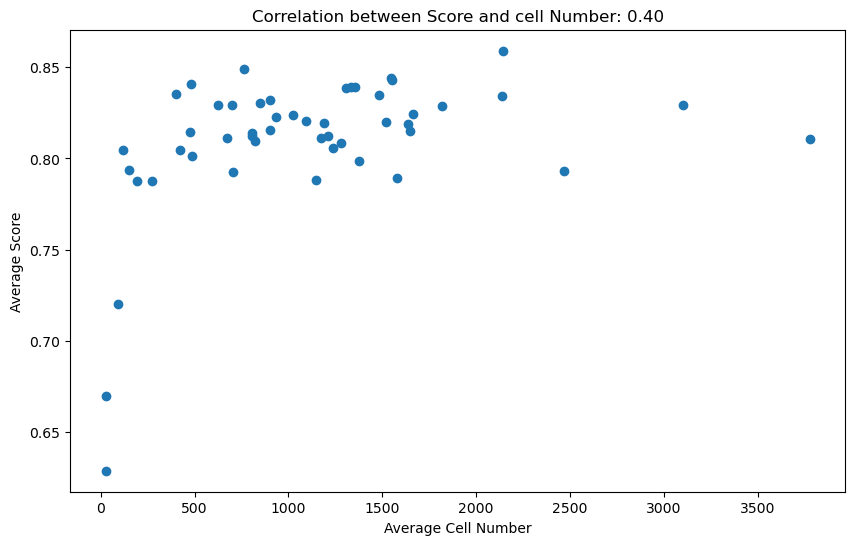

In [216]:
# Compute the row averages
avg_df1 = df1_sorted.mean(axis=0)
avg_df2 = df2_sorted.mean(axis=0)

# Calculate the correlation between row averages
correlation = np.corrcoef(avg_df1, avg_df2)[0, 1]

# Print the correlation value
print(f"Correlation between the row averages: {correlation}")

spearman_corr, _ = spearmanr(avg_df1, avg_df2)
print(spearman_corr)


# Plot the row averages
plt.figure(figsize=(10, 6))
plt.scatter(avg_df2,avg_df1)
plt.title(f'Correlation between Score and cell Number: {spearman_corr:.2f}')
plt.xlabel('Average Cell Number')
plt.ylabel('Average Score')
plt.show()


4    0.605220
1    0.533463
5    0.952328
0    0.975632
3    0.987204
2    0.825264
dtype: float64